In [2]:
from scipy.stats import gamma, binom
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
a = 10
b = 2000

In [3]:
deals = binom.rvs(30, .2, size=1000)
sales = gamma.rvs(4, scale=500, size=1000)

In [4]:
def plot_sample(sample, kind='kde'):
    sns.displot(sample, kind=kind)

    plt.show()

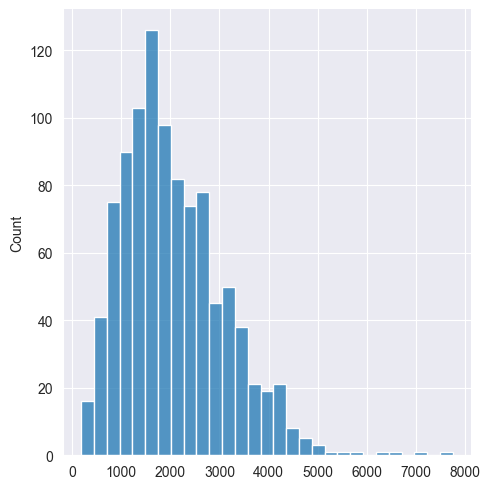

In [5]:
plot_sample(sales, kind='hist')

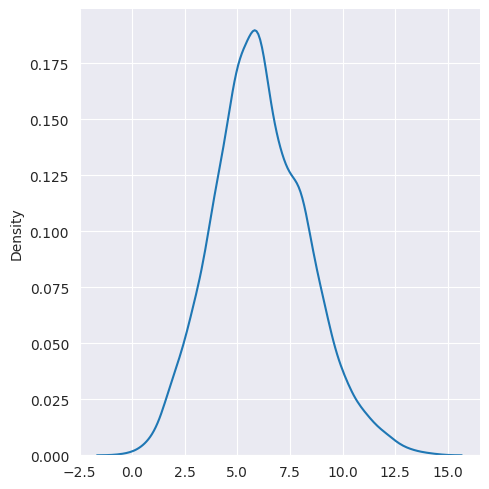

In [5]:
plot_sample(deals)

In [6]:
import itertools
z = itertools.product(deals, sales)

In [7]:
z = [a * b for (a, b) in z]

<Axes: ylabel='Count'>

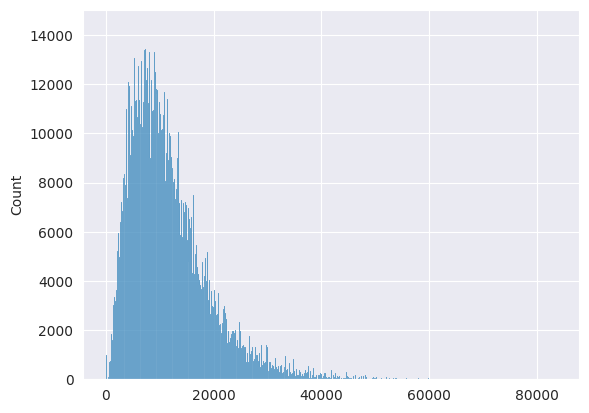

In [8]:
sns.histplot(z)

In [9]:
from scipy.stats import gaussian_kde

z_density = gaussian_kde(z)

z_values = np.linspace(min(z), max(z), 1000)

z_pdf = z_density(z_values)

In [10]:
# Profit density
profit_density = gaussian_kde((np.array(z) - 3000) / 2)

profit_values = np.linspace(min(z), max(z), 1000)

profit_pdf = profit_density(profit_values)

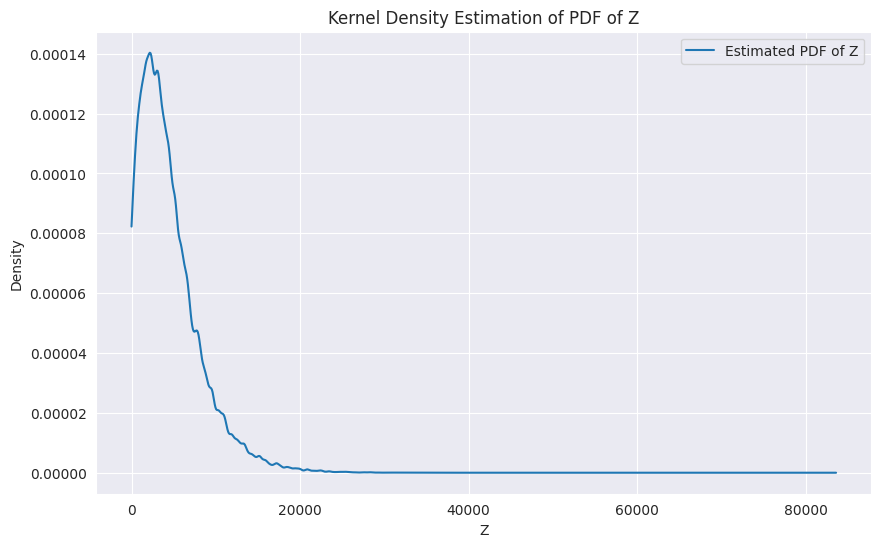

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(profit_values, profit_pdf, label='Estimated PDF of Z')
plt.title('Kernel Density Estimation of PDF of Z')
plt.xlabel('Z')
plt.ylabel('Density')
plt.legend()
plt.show()

In [12]:
a, b = 20000, 23000

# Use numerical integration to estimate the probability of Z being in the interval [a, b]
probability = np.trapz(y=z_density(np.linspace(a, b, 1000)), x=np.linspace(a, b, 1000))
print(f"Probability of 99.5 <= Z <= 100.5 is approximately {probability:.4f}")

Probability of 99.5 <= Z <= 100.5 is approximately 0.0437


In [15]:
def p_profit(amt):
    probability = np.trapz(y=profit_density(np.linspace(amt, max(.5*np.array(z)), 1000)), x=np.linspace(amt, max(.5*np.array(z)), 1000))
    print(f"Probability of ${amt} or more profit is approximately {probability:.4f}")

p_profit(3000)

Probability of $3000 or more profit is approximately 0.5701
